In [23]:
from __future__ import division
from PIL import Image

In [24]:
im1 = Image.open("img1.png")
im2 = Image.open("img2.png")
im3 = Image.open("img3.png")
im4 = Image.open("img4.png")

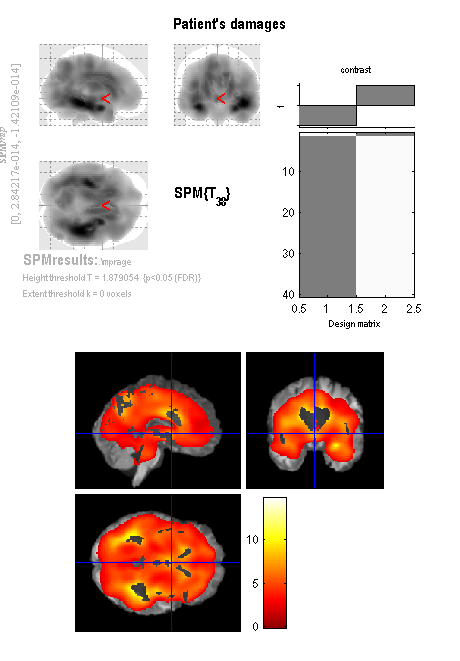

In [25]:
im1

In [26]:
print(im1.size)

(460, 661)


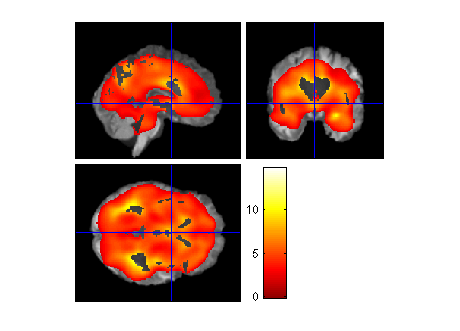

In [27]:
im1_crop = im1.crop((0, int(im1.size[1]/2), im1.size[0], im1.size[1]))
im1_crop

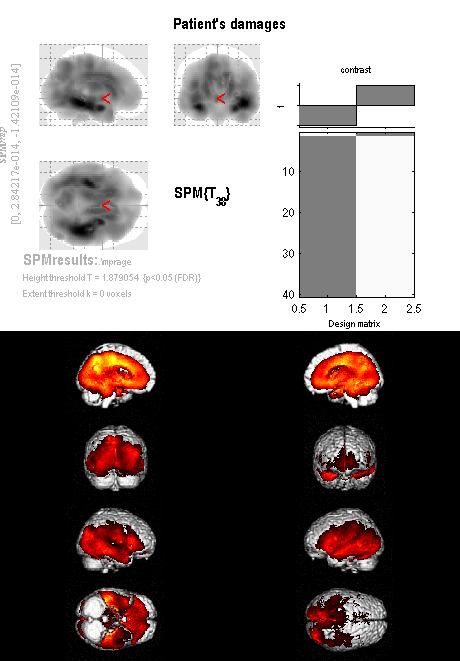

In [28]:
im2

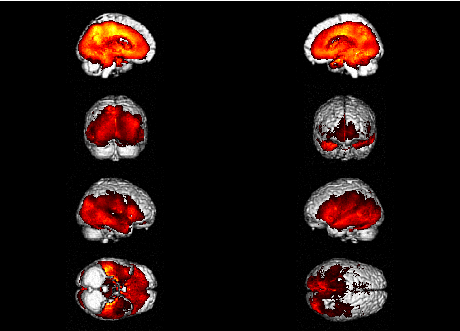

In [29]:
im2_crop = im2.crop((0, int(im2.size[1]/2), im2.size[0], im2.size[1]))
im2_crop

In [30]:
im2_crop.size

(460, 331)

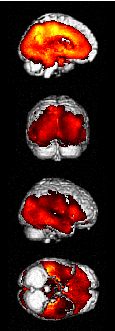

In [31]:
im2_col1 = im2_crop.crop((im2_crop.size[0]/8, 0, (im2_crop.size[0]/8) * 3, im2_crop.size[1]))
im2_col1

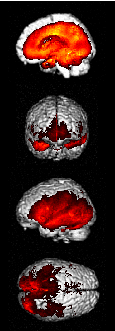

In [32]:
im2_col2 = im2_crop.crop((im2_crop.size[0]/8 * 5, 0, (im2_crop.size[0]/8) * 7, im2_crop.size[1]))
im2_col2

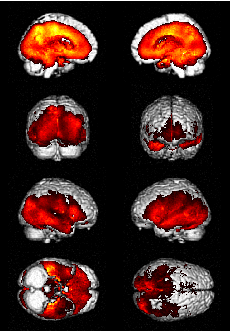

In [33]:
im2_new = Image.new('RGB', (im2_col1.size[0] + im2_col2.size[0], max(im2_col1.size[1], im2_col2.size[1])))
im2_new.paste(im2_col1, (0, 0))
im2_new.paste(im2_col2, (im2_col1.size[0], 0))
im2_new

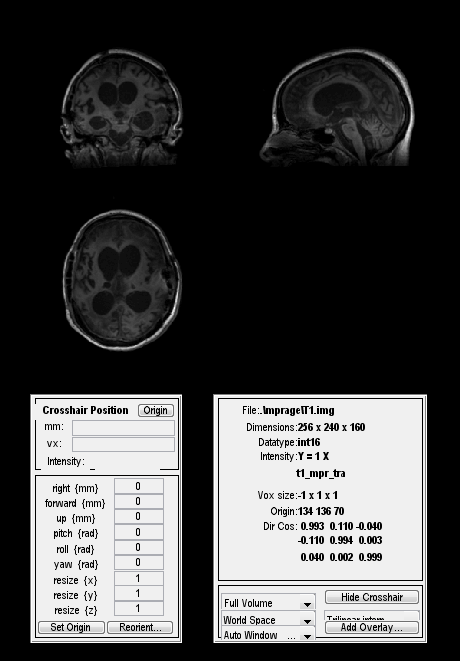

In [34]:
im3

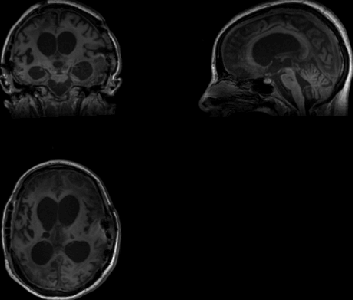

In [37]:
from PIL import Image, ImageChops

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

im3_crop = im3.crop((0, 0, im3.size[0], int(im3.size[1]/5*2.7)))
im3_trimmed = trim(im3_crop)
im3_trimmed

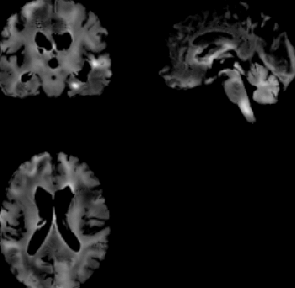

In [38]:
im4_crop = im4.crop((0, 0, im4.size[0], int(im4.size[1]/5*2.7)))
im4_trimmed = trim(im4_crop)
im4_trimmed

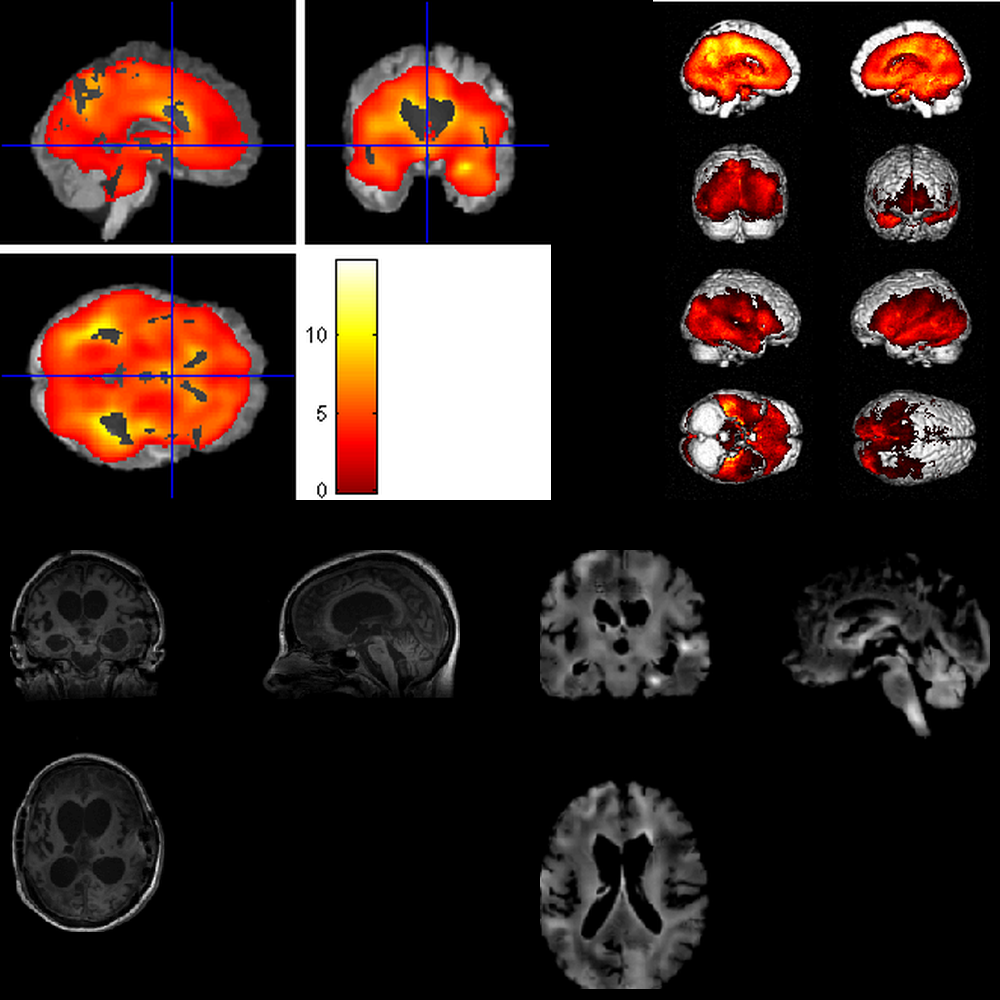

In [41]:
im1_trimmed = trim(im1_crop)

def resize_height(img, baseheight):
    baseheight = int(baseheight)
    hpercent = (baseheight/float(img.size[1]))
    wsize = int((float(img.size[0])*float(hpercent)))
    return img.resize((wsize, baseheight), Image.ANTIALIAS)

def resize_width(img, basewidth):
    basewidth = int(basewidth)
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    return img.resize((basewidth, hsize), Image.ANTIALIAS)

im_width = im_height = 1000

im_parts_top = [resize_height(img, im_height/2) for img in (im1_trimmed, im2_new)]
im_parts_bottom = [resize_width(img, (im_width/2)*0.9) for img in (im3_trimmed, im4_trimmed)]

im_full = Image.new('RGB', size=(im_width, im_height), color=(0,0,0,0))
im_full.paste(im_parts_top[0], (0,0))
im_full.paste(im_parts_top[1], (im_width-im_parts_top[1].size[0],0))
im_full.paste(im_parts_bottom[0], (10,int((im_height/2)*1.1)))
im_full.paste(im_parts_bottom[1], (im_width-im_parts_bottom[1].size[0]-10,int((im_height/2)*1.1)))
im_full